In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from random import shuffle
import matplotlib.pyplot as plt
#print(os.listdir("./train/"))

In [35]:
train_path="./Class8/Train/"
train_label_path = "./Class8/train_labels/Labels.txt"
test_path = "./Class8/Test/"
test_label_path = "./Class8/test_labels/Labels.txt"
label=[]
data1=[]
counter=0
IMG_SIZE = 300

In [28]:
def get_labels(path):
    labels_data = pd.read_csv(path)
    labels_data = labels_data["1"].str.split("\t", expand = True)
    return labels_data[1]

def load_images_to_array(path):
    training_data = []
    for img in os.listdir(path):
        image_full_path = os.path.join(path,img)
        img = Image.open(image_full_path)
        img = img.convert("L")
        img = img.resize((IMG_SIZE,IMG_SIZE),Image.ANTIALIAS)
        training_data.append([np.array(img)])
    #training_data = shuffle(training_data)
    return training_data

def convert_labels_to_one_not_encode(labels):
    trainLabels = []
    for i in range(0, len(labels)):
        lab = labels[i]
        if lab == "0":
            trainLabels.append(np.array([1,0]))
        else:
            trainLabels.append(np.array([0,1]))
    trainLabels = np.array(trainLabels)
    return trainLabels

In [29]:
labels = get_labels(train_label_path)

In [30]:
features = load_images_to_array(train_path)

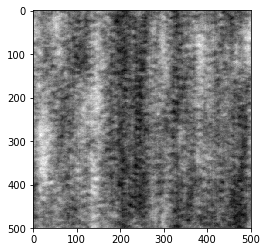

In [34]:
plt.imshow(features[100][0], cmap="gist_gray")

In [8]:
trainImages = np.array([i for i in features]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = convert_labels_to_one_not_encode(labels)

array([106], dtype=uint8)

In [36]:
trainLabels.shape

(1150, 2)

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [39]:
model.fit(trainImages, trainLabels, batch_size = 100, epochs = 5, verbose = 1)

Epoch 1/5
1150/1150 [==============================] - 283s 246ms/step - loss: 0.6552 - acc: 0.8165
Epoch 2/5
1150/1150 [==============================] - 276s 240ms/step - loss: 0.4511 - acc: 0.8583
Epoch 3/5
1150/1150 [==============================] - 277s 241ms/step - loss: 0.3842 - acc: 0.8670
Epoch 4/5
1150/1150 [==============================] - 277s 241ms/step - loss: 0.3392 - acc: 0.8774
Epoch 5/5
1150/1150 [==============================] - 282s 245ms/step - loss: 0.3008 - acc: 0.8870


In [41]:
test_features = load_images_to_array(test_path)
test_labels = get_labels(test_label_path)
testImages = np.array([i for i in test_features]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = convert_labels_to_one_not_encode(test_labels)
loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

83.56521740167038
